In [463]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

import warnings
warnings.filterwarnings(action='ignore')

### Step 1: Reading and understanding the data

In [464]:
bike = pd.read_csv('day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [465]:
# Checking the Rows and Columns
# Checking the shape of the dataset.
bike.shape

(730, 16)

In [466]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [467]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [468]:
# Checking null percentage column wise
bike.isnull().all(axis=0).sum()

# Observations:
# There are no null/missing values in the columns.

0

In [469]:
# Checking for all the null rows
bike.isnull().all(axis=1).sum()

# No null values in the rows

0

In [470]:
# Checking for duplicate enteries in rows:
# Check for duplicate rows
duplicate_rows = bike.duplicated()

(duplicate_rows > 0).sum()

# All the rows are unique.

0

In [471]:
# Handling Categorical Columns:
# Changing season to there mapping values.
bike['season'] = bike['season'].replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

# Changing weathersit to there mapping values.
bike['weathersit'] = bike['weathersit'].replace({1: "Clear", 2: "Mist", 3: "Snow", 4: "Rain"})

# Changing weathersit to there mapping values.
bike['mnth'] = bike['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Changing weathersit to there mapping values.
bike['weekday'] = bike['weekday'].replace({0: 'Tuesday', 1: 'Wednesday', 2: 'Thursday', 3: 'Friday', 4: 'Saturday', 5: 'Sunday', 6: 'Monday'})

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Monday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [472]:
# Since instant variables is a index like column, and can be dropped.
# Since we have extracted date information, and hence dteday can be dropped.
col_drop = ['instant', 'dteday']

bike = bike.drop(col_drop, axis=1)

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Monday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 2: Visualizing the Data

#### Visualizing Numerical Columns.

<Figure size 1000x2000 with 0 Axes>

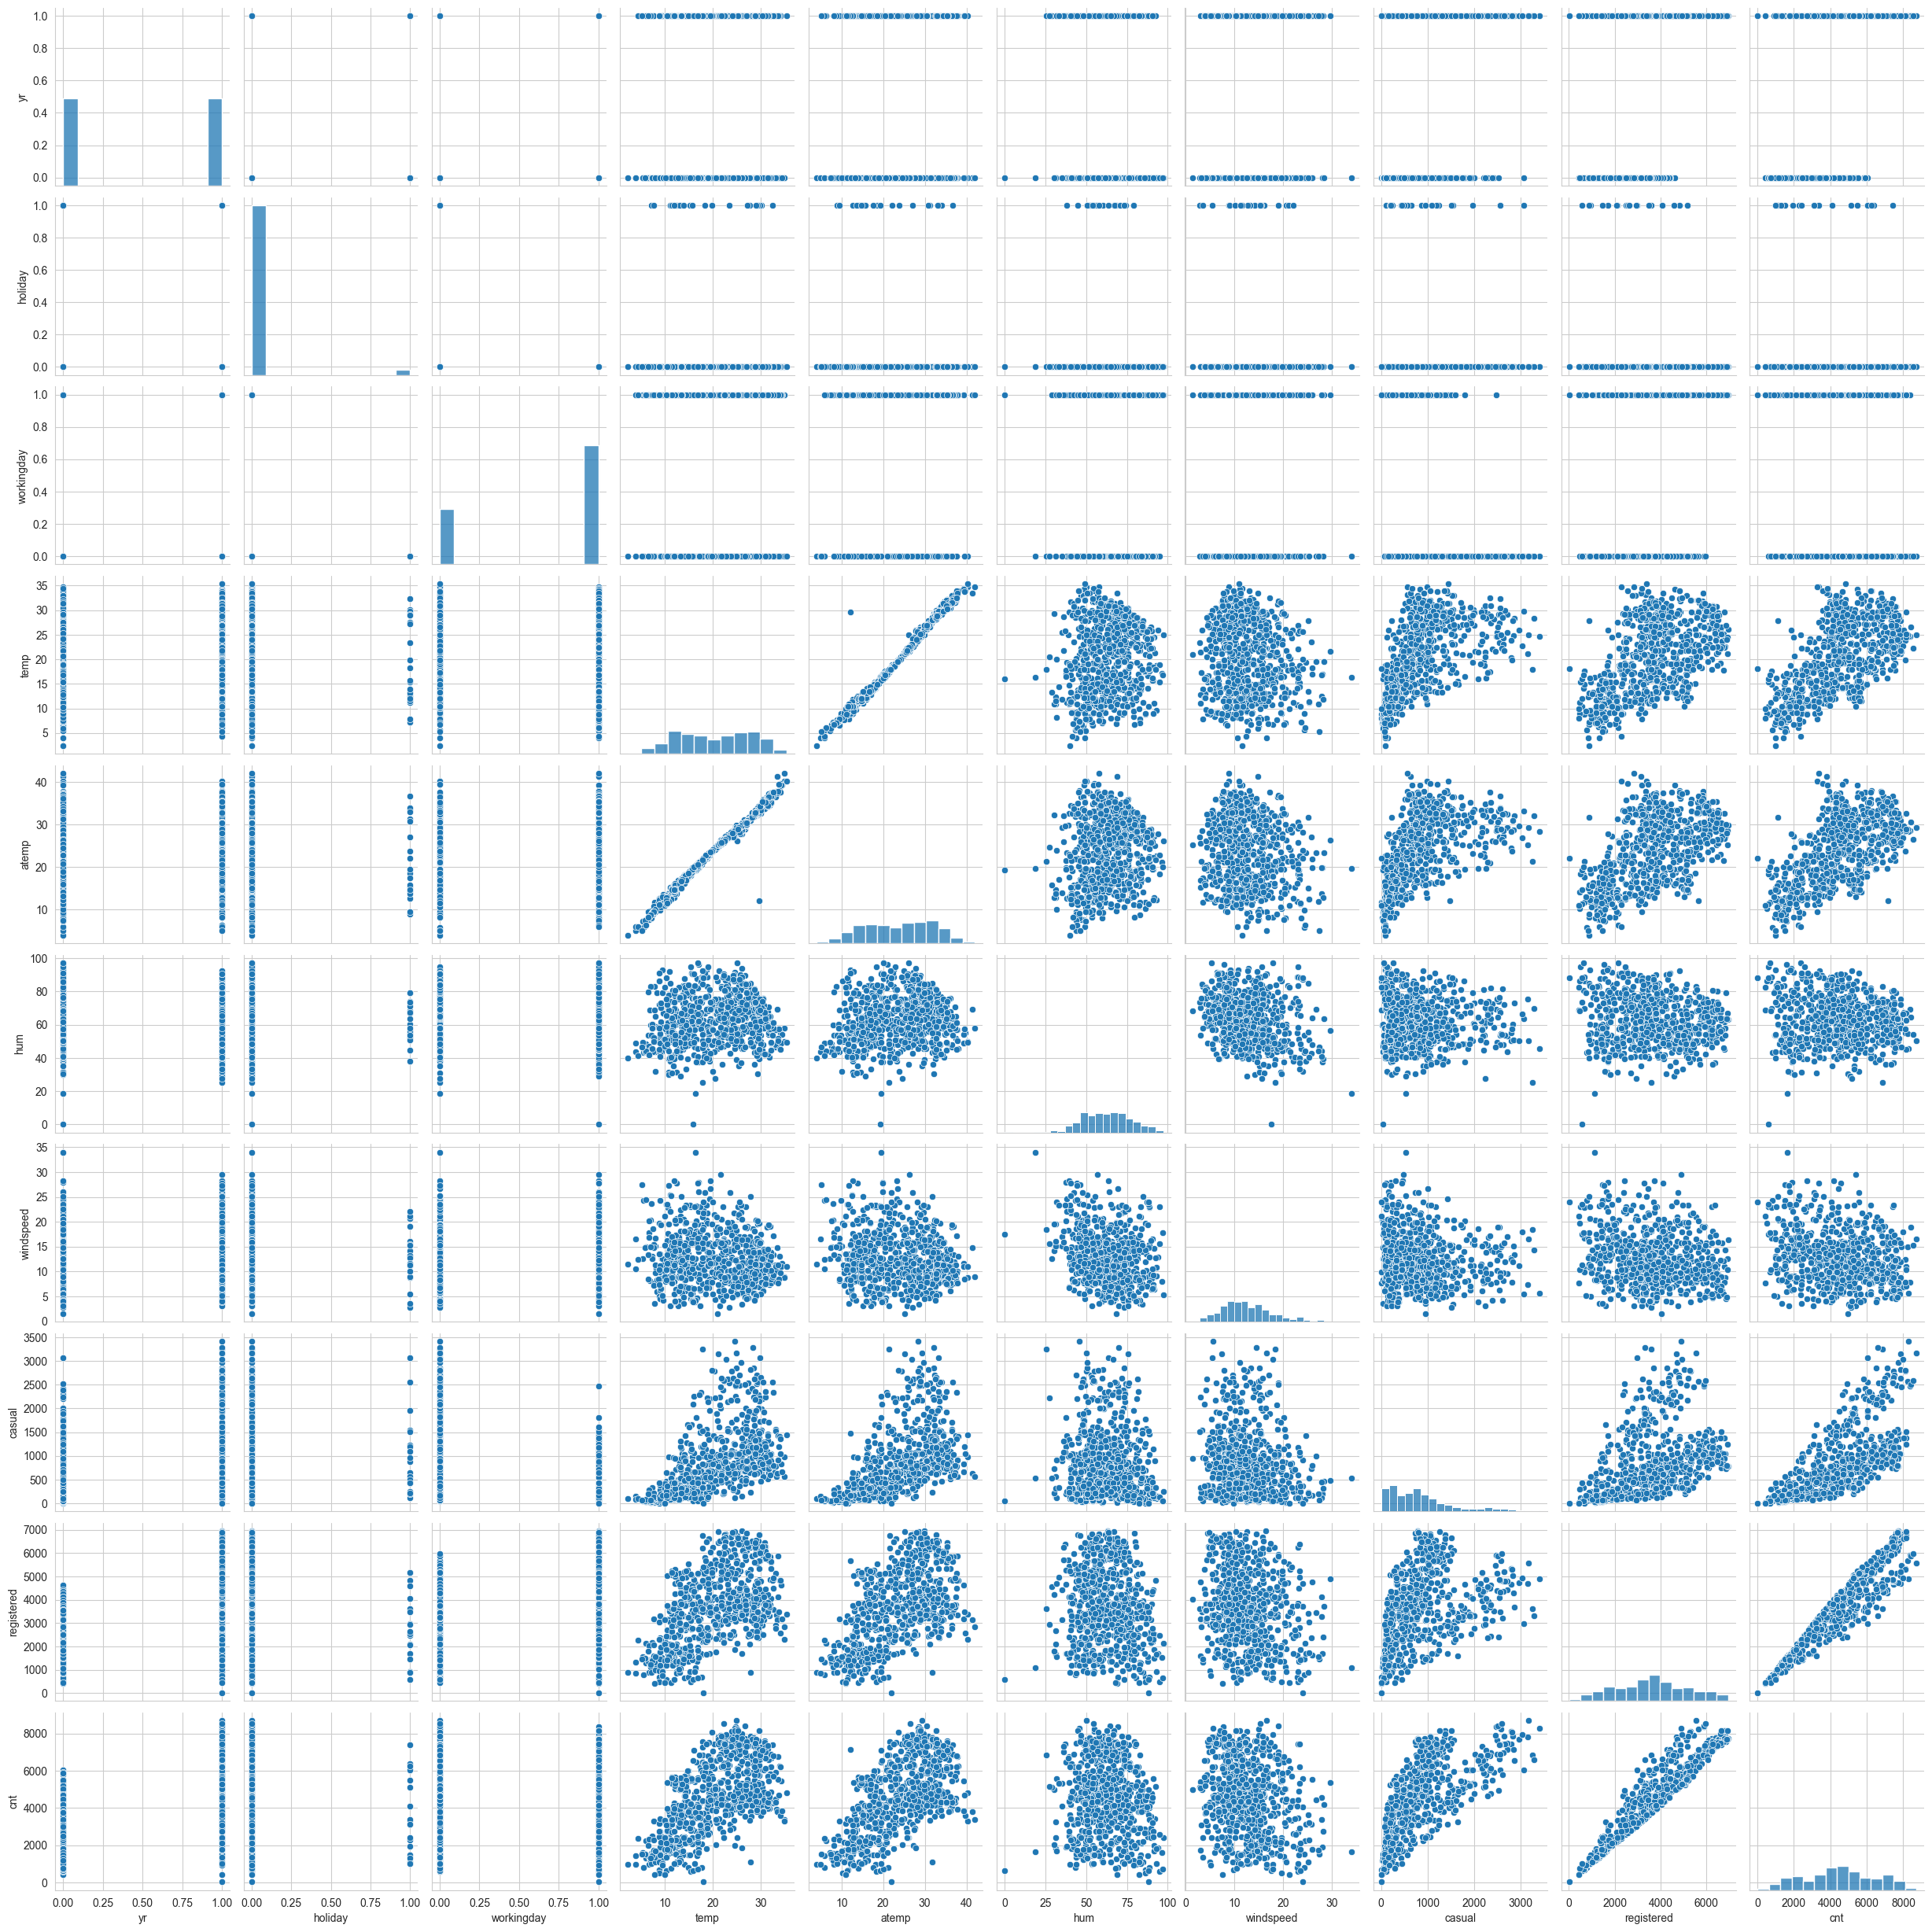

In [473]:
#Visualising the numeric variables
plt.figure(figsize=(10, 20))
sns.pairplot(bike)
plt.show()

# Observations:
# 1. Temp and Atemp seems to follow the linear relationship with total count.
# 2. Hum and Windspeed does not seems to follow any pattern.

#### Visualizing Categorical Columns

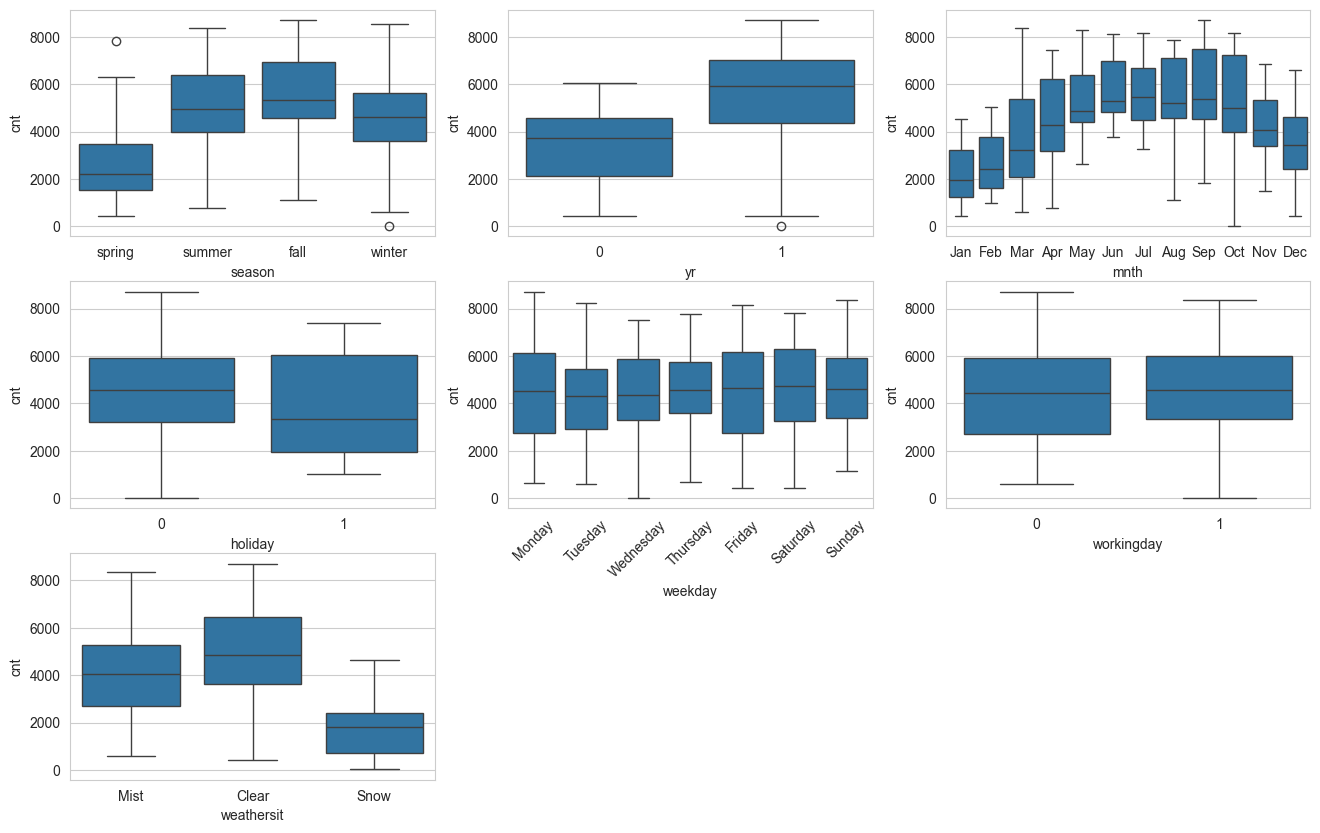

In [474]:
#Visualise categorical variables using boxplot
plt.figure(figsize=(16, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(3, 3, 2)
sns.boxplot(x='yr', y='cnt', data=bike)
plt.subplot(3, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.subplot(3, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.subplot(3, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=bike)
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.subplot(3, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.subplot(3, 3, 7)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.show()

#Observations:
# 1. The demand of shared bikes is more in fall season and 2019 year.
# 2. The sales of shared bikes is more in Aug, Sep and Oct
# 3. The sales of shared bikes is more when the weather situation is clear.
# 4. The average sales of shared bikes in weekdays is quite close, only key difference is in the lower 25 quartile.

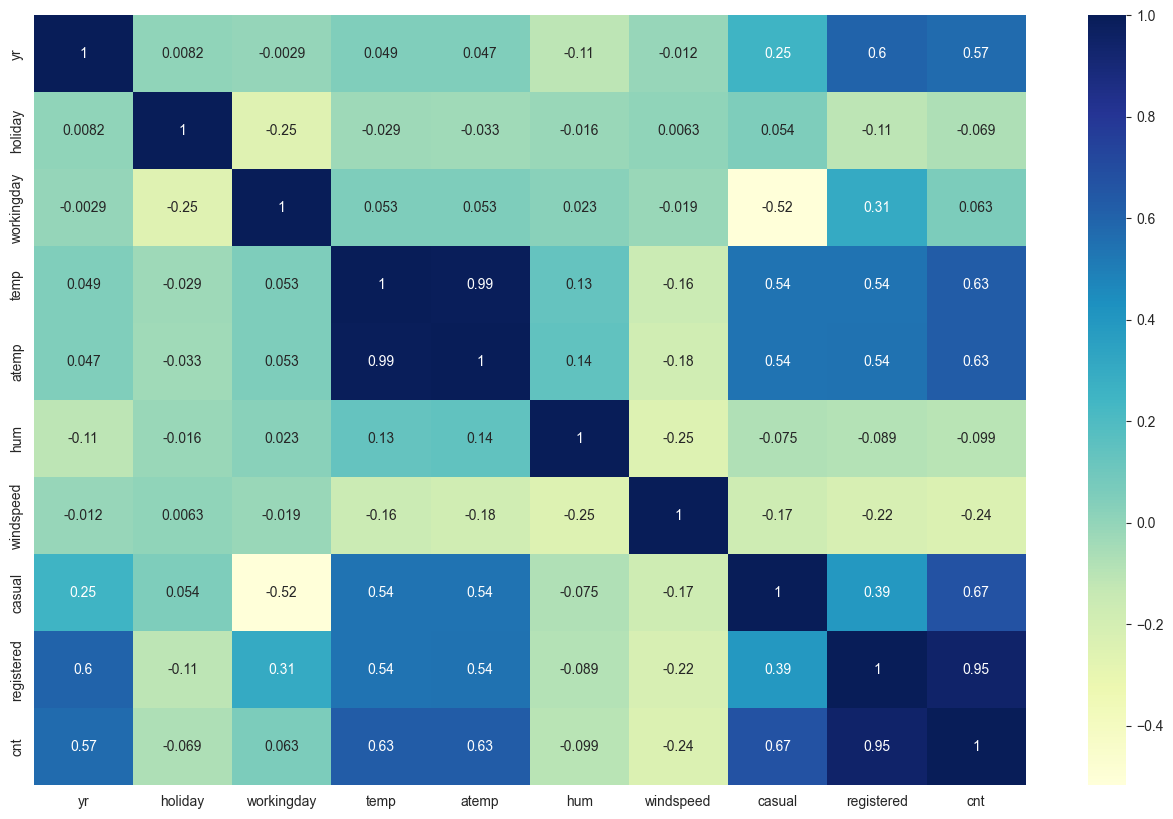

In [475]:
plt.figure(figsize=(16,10))
sns.heatmap(bike.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.show()

# Since temp and atemp are highly correleated, so we can drop atemp.
# Since causal and registered are highly correleated with cnt, so we can drop them.

In [476]:
bike = bike.drop(['atemp', 'registered', 'casual'], axis=1)

### Step 3: Data Preparation

### Dummy Variables

In [477]:
weathers = pd.get_dummies(bike['weathersit'], dtype=int, drop_first=True)

seasons = pd.get_dummies(bike[['season', 'mnth', 'weekday']], dtype=int, drop_first=True)

In [478]:
bike = pd.concat([bike, seasons, weathers], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Mist,Snow
0,spring,0,Jan,0,Monday,0,Mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tuesday,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [479]:
# dropping the categorical variables whose dummy variables are created.
cat_drop_columns = ['season', 'weekday', 'mnth', 'weathersit']

bike = bike.drop(cat_drop_columns, axis=1)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Mist,Snow
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split the Data into train and test sets

In [480]:
from sklearn.model_selection import train_test_split

# We can specify the train:test ratio to be 70:30 persent, and fix the rows by setting random_state=100
df_train, df_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Mist,Snow
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [481]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Mist,Snow
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### Scaling the numerical values using MinMaxScaler.

In [482]:
from sklearn.preprocessing import MinMaxScaler

In [483]:
# Since some of the columns having only values as 0 and 1, and it doesn't impact the MinMaxScaler and hence we will only consider numerical columns.
num_col = ['temp', 'hum', 'windspeed', 'cnt']

scaler = MinMaxScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Mist,Snow
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,1,0


### Getting X and y variables from the training dataset.

In [484]:
y_train = df_train.pop('cnt')
X_train = df_train

### Step 4: Building the Model

### Using RFE from sklearn

In [485]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [486]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)             # running RFE to select 15
rfe = rfe.fit(X_train, y_train)

In [487]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 2),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 2),
 ('mnth_Jun', False, 2),
 ('mnth_Mar', False, 2),
 ('mnth_May', False, 2),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 2),
 ('weekday_Sunday', False, 2),
 ('weekday_Thursday', False, 2),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 2),
 ('Mist', True, 1),
 ('Snow', True, 1)]

In [488]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jan', 'mnth_Sep',
       'weekday_Monday', 'weekday_Tuesday', 'Mist', 'Snow'],
      dtype='object')

In [489]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jul',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Wednesday'],
      dtype='object')


### Building model using statsmodel, for the detialed statistics

In [490]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [491]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [492]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [493]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          2.98e-187
Time:                        08:56:32   Log-Likelihood:                 504.57
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     496   BIC:                            -921.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2565      0.026     

In [494]:
## Dropping holiday since it has high p-value
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

### Rebuilding the model

In [495]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

In [496]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [497]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          2.98e-187
Time:                        08:56:32   Log-Likelihood:                 504.57
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     496   BIC:                            -921.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2536      0.041     

In [498]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jan', 'mnth_Sep',
       'weekday_Monday', 'weekday_Tuesday', 'Mist', 'Snow'],
      dtype='object')

### Calculating VIFs

In [499]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [500]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [501]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.98
1,workingday,17.02
2,temp,15.55
9,weekday_Monday,4.60
4,windspeed,4.51
10,weekday_Tuesday,4.47
5,season_spring,3.10
11,Mist,2.28
6,season_winter,2.18
0,yr,2.08


In [502]:
## Dropping hum since it has high VIF value
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [503]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

In [504]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [505]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.8
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          3.83e-186
Time:                        08:56:32   Log-Likelihood:                 499.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1859      0.035     

In [506]:
### Calculating VIF
X_train_new = X_train_lm.drop(['const'], axis=1)

In [507]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,13.29
2,temp,11.21
3,windspeed,4.49
8,weekday_Monday,3.82
9,weekday_Tuesday,3.58
4,season_spring,2.85
0,yr,2.07
5,season_winter,1.78
6,mnth_Jan,1.64
10,Mist,1.57


In [508]:
## Dropping hum since it has high VIF value
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [509]:
X_train_lm = sm.add_constant(X_train_new)

In [510]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [511]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.2
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          4.14e-184
Time:                        08:56:32   Log-Likelihood:                 491.51
No. Observations:                 510   AIC:                            -959.0
Df Residuals:                     498   BIC:                            -908.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2852      0.025     

In [512]:
## Dropping weekday_Sunday since it has high p-value
X_train_new = X_train_lm.drop(["weekday_Monday"], axis = 1)

In [513]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          5.58e-185
Time:                        08:56:32   Log-Likelihood:                 490.72
No. Observations:                 510   AIC:                            -959.4
Df Residuals:                     499   BIC:                            -912.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2876      0.025     

In [514]:
### Calculating VIF
X_train_new = X_train_lm.drop(['const'], axis=1)

In [515]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
1,temp,3.84
3,season_spring,2.24
0,yr,2.06
5,mnth_Jan,1.60
8,Mist,1.51
4,season_winter,1.37
7,weekday_Tuesday,1.17
6,mnth_Sep,1.16
9,Snow,1.08


### Step 5: Residual Analysis of train data

In [516]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

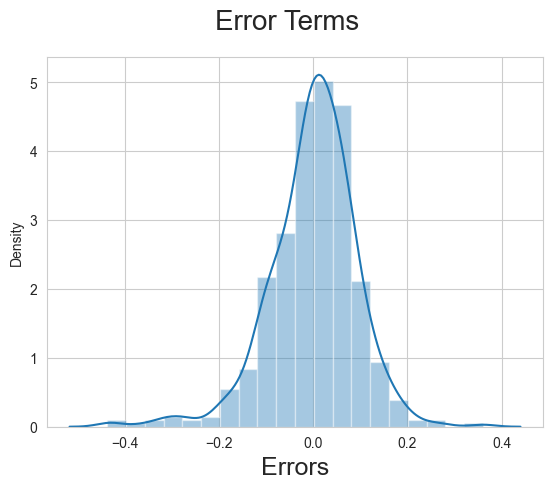

In [517]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

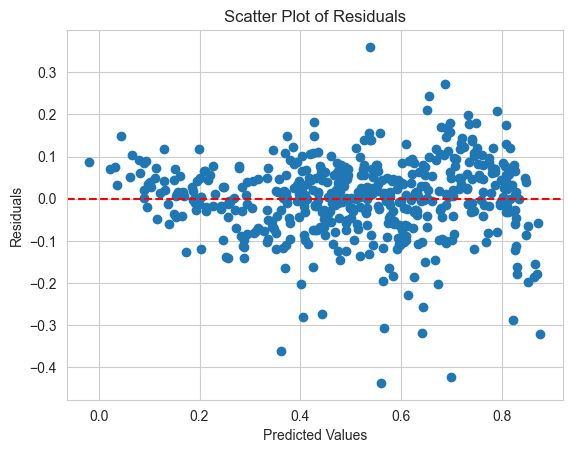

In [518]:
# Plot residuals against predicted values
plt.scatter(y_train_pred, y_train - y_train_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.show()

# Observations:
# It seems the residuals should be randomly distributed around the horizontal line at y=0 without any clear pattern.

### Verifying the Assumption using Q-Q plot

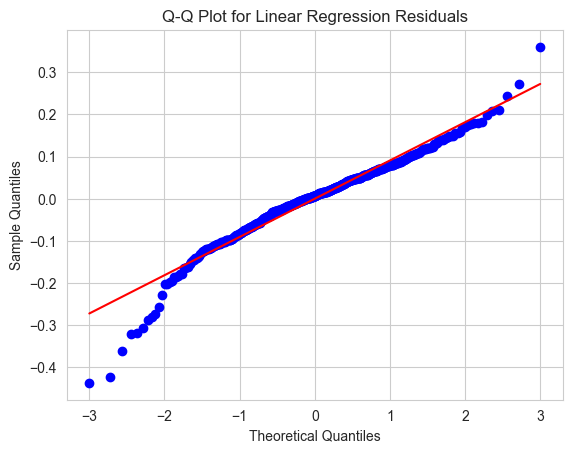

In [519]:
import scipy.stats as stats

# Generate a Q-Q plot
stats.probplot(y_train - y_train_pred, dist="norm", plot=plt)
plt.title("Q-Q Plot for Linear Regression Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

# It shows that residuals are lies near to straight line, which means they are normally distributed.
# It also gives an indication of some negative skews in the residuals as the tails have higher data points going in a negative direction.

### Step 6: Getting the predictions on the test dataset

### Applying the Scalers on test data.

In [520]:
num_col = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_col] = scaler.transform(df_test[num_col])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Mist,Snow
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### Divide dataset into X_test and y_test

In [521]:
y_test = df_test.pop('cnt')
X_test = df_test

In [522]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [523]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

### Step 7: Model Evaluation

In [524]:
from sklearn.metrics import r2_score

In [525]:
# Getting r2 score on the test dataset.
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8002858320678646

In [526]:
y_train_pred = lm.predict(X_train_lm)

In [527]:
# Getting r2 score on the train dataset.
r2_score(y_true=y_train, y_pred=y_train_pred)

0.830241609465403

Text(0, 0.5, 'y_pred')

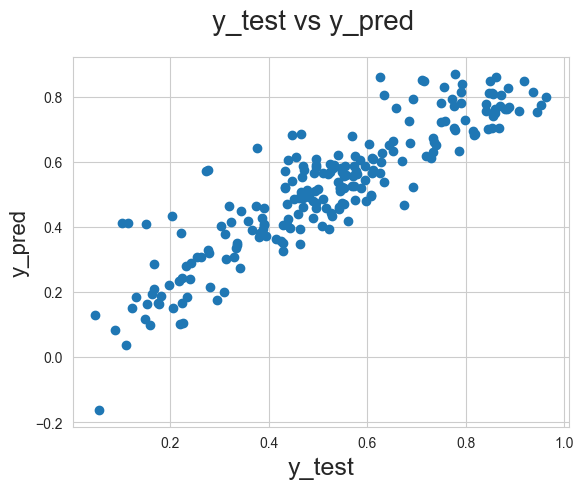

In [528]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Observations:
1. The predicted model will follow the following linear equation:
   y = 0.2876 + 0.2364yr + 0.3905temp - 0.1474windspeed - 0.1069season_spring + 0.0421season_winter - 0.0501mnth_Jan + 0.0647mnth_Sep - 0.0464weekday_Tuesday - 0.0778Mist - 0.2904Snow
2. It seems the demand for bikes will be more in the summer season when the temp is quite high.
3. The demand for shared bikes will be more in 2019.
4. The demand for shared bikes will be less when there is a Mist or Snow weather condition.
5. Company can provide some offers in the month of Sep, so that the demand will be increased from September and January.
6. The demand for shared bikes will be less if there is more windspeed in the particular month.

### Conclusion:
The best fitted equation for predicting the demand of shared bikes depends on the majour factors like the year, temperature and winter season in a positive manner, while the weather like Mist and Snow will impact the sales in the negative manner. Overall the sales will be higher in month of September and January followed by the less demand on Tuesday.